In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [8]:
data = pd.read_csv(r"c:\Users\DELL\Documents\Data Science\boston.csv")

In [9]:
data.info()
print("\n")
data.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
data = data.drop_duplicates()

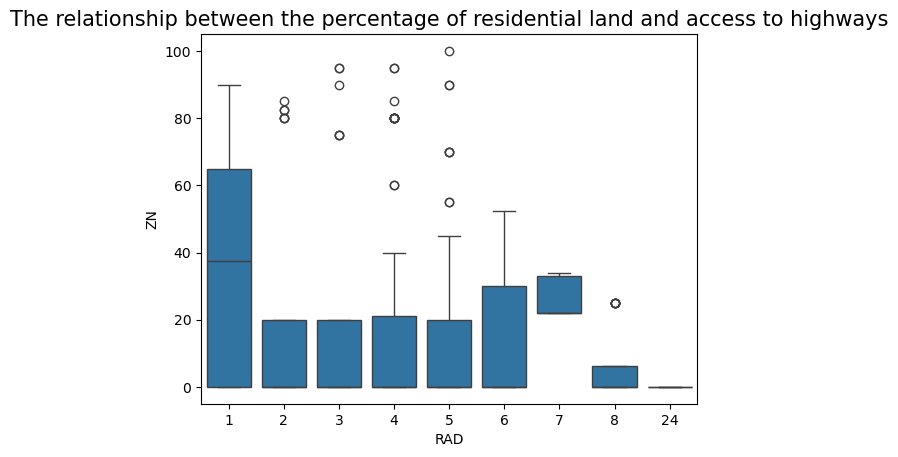

In [13]:
sns.boxplot(x='RAD' , y='ZN' , data=data )
plt.title("The relationship between the percentage of residential land and access to highways",fontsize=15)
plt.show()

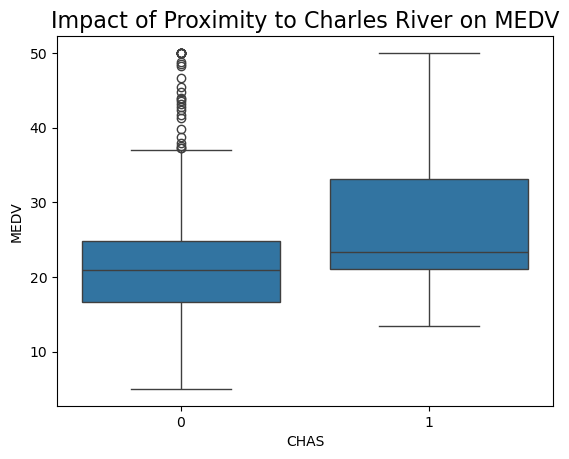

In [14]:
sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.title('Impact of Proximity to Charles River on MEDV', fontsize=16)
plt.show()

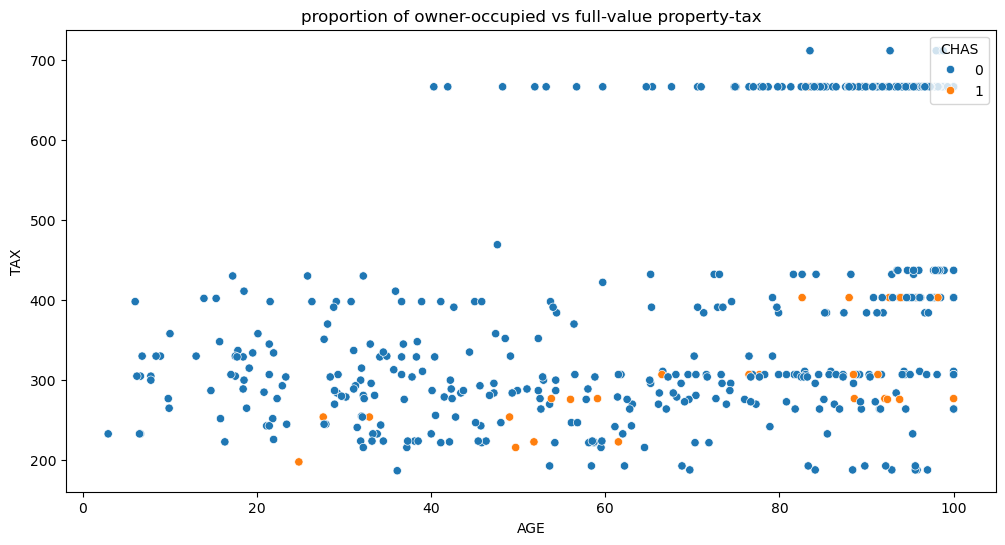

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='AGE', y='TAX', hue='CHAS')
plt.title('proportion of owner-occupied vs full-value property-tax')
plt.legend(title='CHAS', loc='upper right')
plt.show()

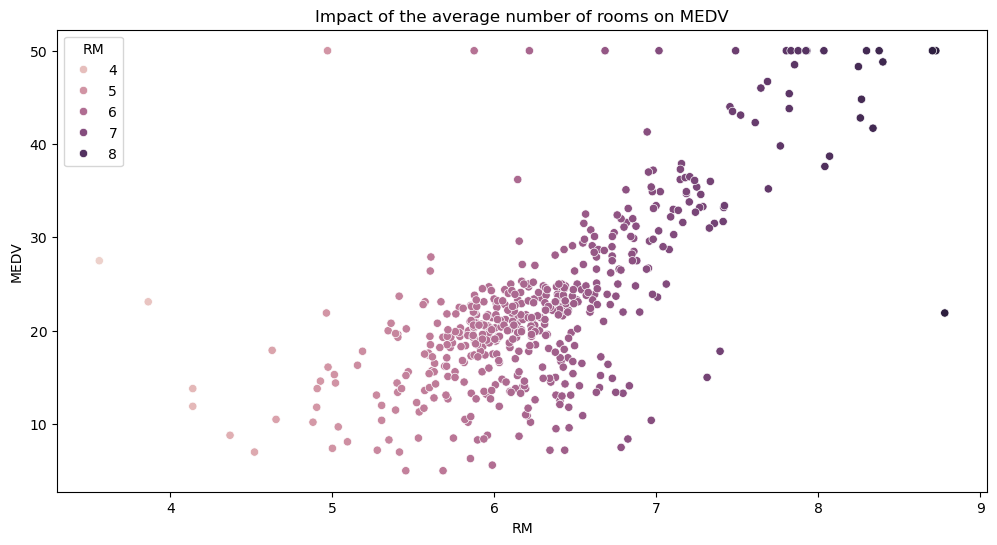

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data , x='RM' , y='MEDV' , hue='RM' )
plt.title('Impact of the average number of rooms on MEDV')
plt.show()

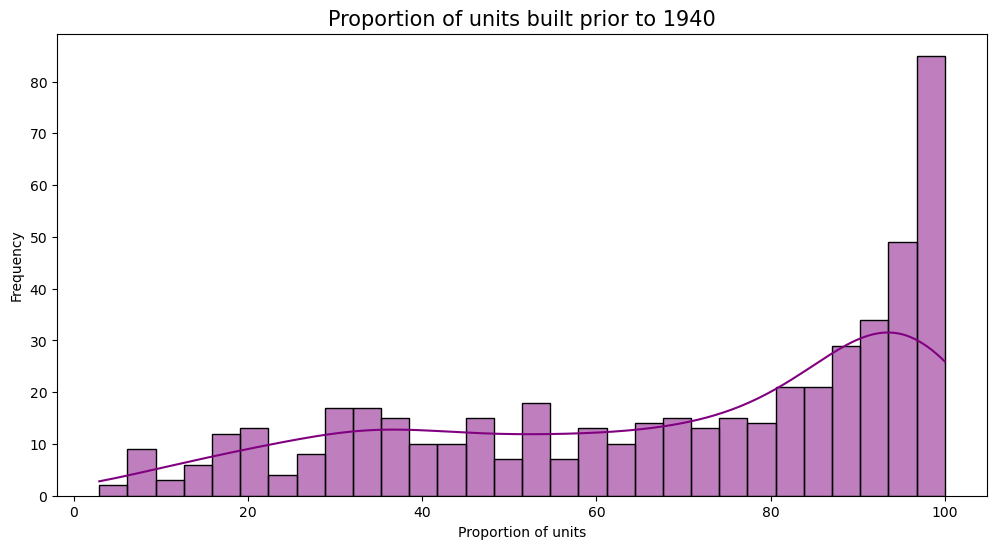

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data['AGE'] , kde =True , bins=30 , color='purple')
plt.title('Proportion of units built prior to 1940' , fontsize=15)
plt.xlabel('Proportion of units')
plt.ylabel('Frequency')
plt.show()

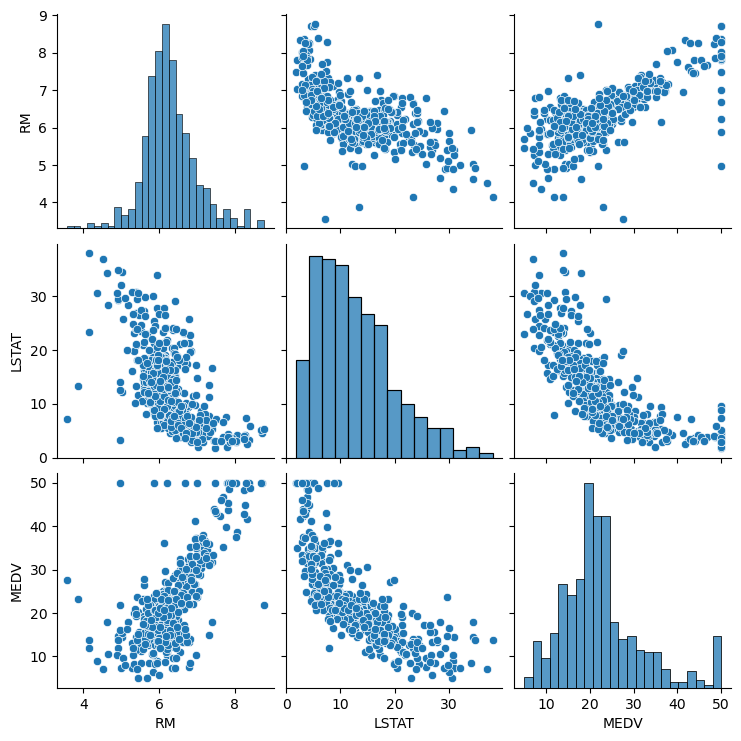

In [21]:
group = data[['RM' , 'LSTAT' , 'MEDV']]
sns.pairplot(group)
plt.show()

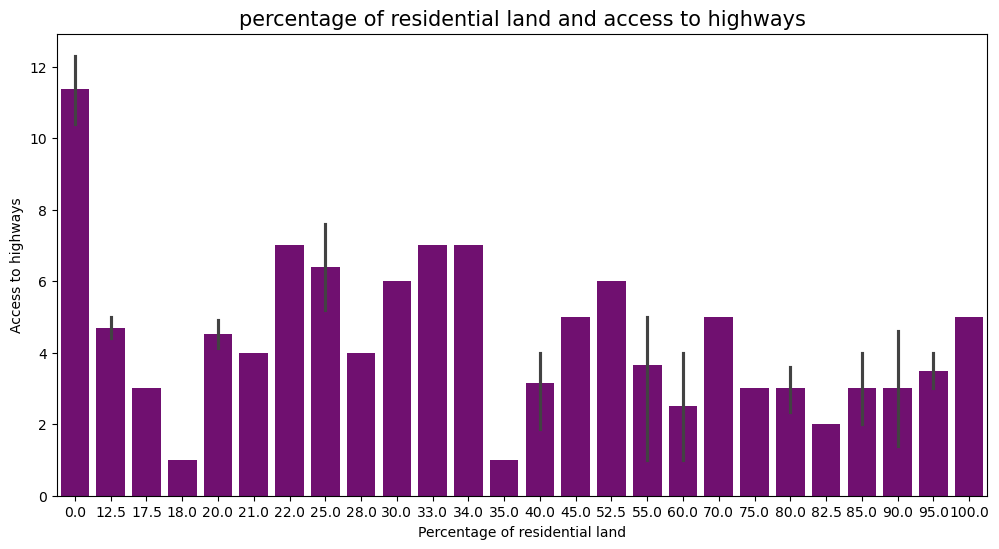

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['ZN'], y=data['RAD'],color='purple')
plt.title('percentage of residential land and access to highways' , fontsize=15)
plt.xlabel('Percentage of residential land')
plt.ylabel('Access to highways')
plt.show()

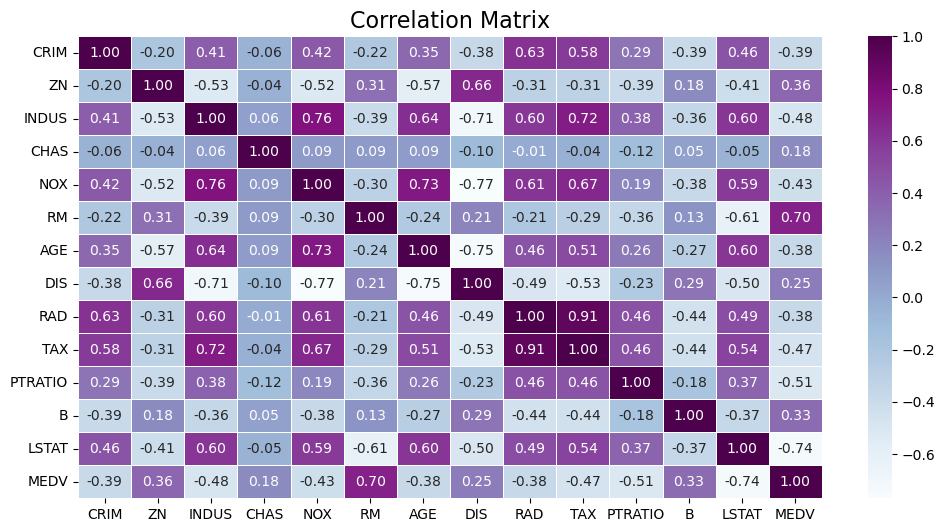

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [23]:
x = data.drop('MEDV' , axis=1)
y = data['MEDV']

x_train, x_test ,y_train ,y_test =train_test_split(x ,y ,test_size=0.2 ,random_state= 42)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


Train shape: (404, 13), Test shape: (102, 13)


In [24]:
data["MEDV"] = data["MEDV"]
Q1 = data["MEDV"].quantile(0.25)
Q3 = data["MEDV"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = data[(data["MEDV"] >= lower_bound) & (data["MEDV"] <= upper_bound)]
print(filtered_data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)
print(predictions)

[22.993 30.882 17.046 22.949 16.533 21.405 19.201 15.657 21.074 20.91
 20.376 19.24   8.679 21.884 19.47  26.116 19.715  8.47  44.758 14.663
 24.844 23.944 14.821 23.564 14.912 15.006 21.343 13.749 19.508 20.988
 19.659 23.353 31.141 20.253 14.425 16.076 34.743 19.241 20.671 24.757
 19.453 29.663 44.492 19.058 22.229 13.53  15.144 24.65  18.527 27.841
 21.23  33.758 16.478 26.314 45.405 22.056 15.43  32.178 22.252 20.495
 25.639 34.098 28.653 18.306 26.49  17.281 13.763 23.086 28.691 15.505
 20.491 29.113 10.201 21.422 22.156  7.138 19.915 45.253 11.541 12.562
 21.054 12.993 20.206  9.359 20.037 26.983 15.125 23.336 23.891 17.971
 21.984  8.136 19.095 18.859 24.082 19.631 40.204 13.396 12.246 14.256
 20.01  24.135]


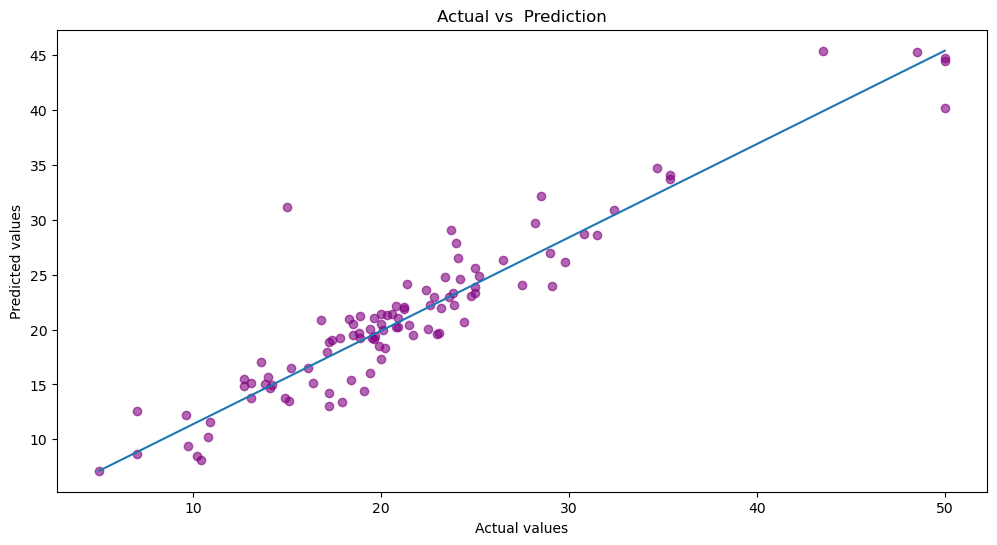

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test , predictions , alpha=0.6 , color = 'Purple')
plt.title('Actual vs  Prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test.min() , y_test.max()], [predictions.min(),predictions.max()])
plt.show()


In [27]:
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    max_depth=10
)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.015223228594398
Mean Squared Error: 2.7878807971879405
R-squared: 0.8940150227578272


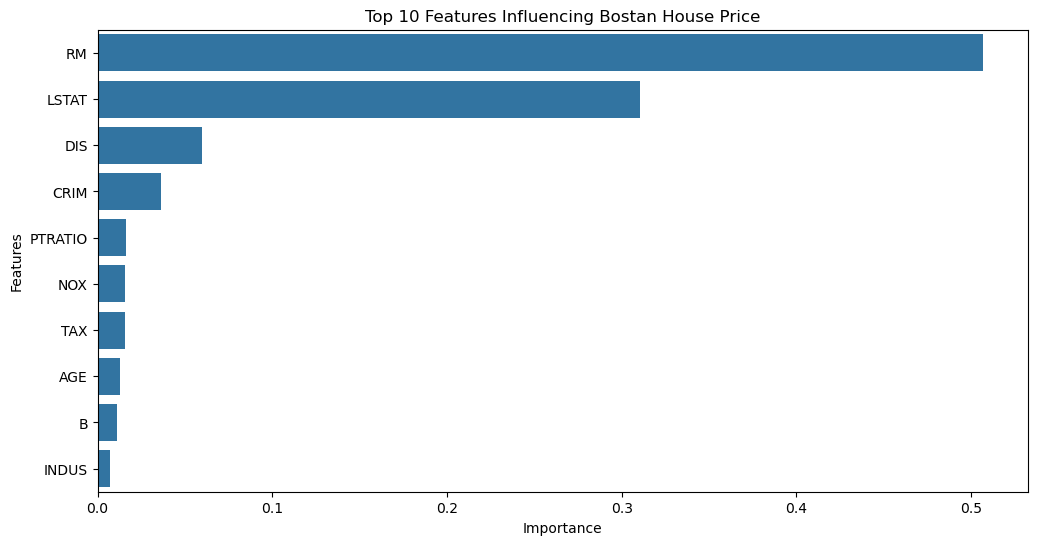

In [28]:
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing Bostan House Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [31]:
import joblib

joblib.dump(rf_model, '../src/trained_model.pkl')
joblib.dump(scaler, '../src/scaler.pkl')

with open('../src/feature_names.txt', 'w') as f:
    f.write('\n'.join(x.columns))